In [2]:
from LogErrLoader import LoadDNDSLogErr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
from scipy.ndimage import uniform_filter1d
import scienceplots

plt.style.use(["science"])
font = {"size": 12}

matplotlib.rc("font", **font)
lwc = 0.5
msc = 5
markEvery = 120
markerList = (
    ".",
    "s",
    "o",
    "v",
    "^",
    "<",
    ">",
    "8",
    "p",
    "*",
    "h",
    "H",
    "D",
    "d",
    "P",
    "X",
)
format = "pdf"

prefix_order =  {
    "lu": 0,
    "il": 1,
    "gm": 2
}


def windowed_std(arr, window_size: int):
    mean = uniform_filter1d(arr, size=window_size, mode="reflect")
    mean_sq = uniform_filter1d(arr**2, size=window_size, mode="reflect")
    std = np.sqrt(mean_sq - mean**2)
    return std[0:-window_size]


base = "NACA0012_H2-MGtest_2_VRes_AOA15.dir"
logs_AOA15 = os.listdir(base)
logs_AOA15.sort(key=lambda s: (prefix_order[s[0:2]],len(s), s))
logs_AOA15 = list(filter(lambda s: s.endswith(".log"), logs_AOA15))
print(logs_AOA15)
data_AOA15 = []
data_AOA15_resMaxes = {}
for log in logs_AOA15:
    m = re.match(r"([\w-]+)_.log", log)
    name = m.group(1)
    data = LoadDNDSLogErr(os.path.join(base, log))
    data_AOA15.append((data, name))
    for key in data:
        max_v = np.array(data[key]).max()
        if key.startswith("res"):
            data_AOA15_resMaxes[key] = (
                max(data_AOA15_resMaxes[key], max_v)
                if key in data_AOA15_resMaxes.keys()
                else max_v
            )

label_map = {
    "ilu": "ILU",
    "gmres5x1": "GMRES+",
    "lusgs": "LUSGS",
}


def name_mapper(name: str):
    for a, b in label_map.items():
        name = name.replace(a, b)
    return name


def plotOne(data, label, plotIndex=0, xAxis="tWall", yAxis="res0", std=0):
    color_seq = matplotlib.color_sequences["tab10"]
    dataY = np.array(data[yAxis][0:-1])
    dataX = data[xAxis][0:-1]
    if std > 0:
        dataY = windowed_std(dataY, std)
        dataX = dataX[0:len(dataY)]
    if yAxis.startswith("res"):
        dataY /= data_AOA15_resMaxes[yAxis]
    plt.plot(
        dataX,
        dataY,
        label=label,
        lw=lwc,
        marker=markerList[plotIndex],
        markevery=markEvery,
        markersize=msc,
        markeredgewidth=lwc,
        markerfacecolor="none",
        color=color_seq[plotIndex % len(color_seq)],
    )
    return plotIndex + 1


def plotAfter(xlim, xlabel="t", ylabel="res0", logy=True):
    if logy:
        plt.yscale("log")
    leg = plt.legend(fontsize=9)
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(visible=True, which="both", alpha=0.3)


series = ["all", "ilu", "lusgs", "gmres"]
tRanges = [250, 500, 700, 250]
nRanges = [2500, 5000, 7000, 2500]

['lusgs_.log', 'lusgs-3lusgs_.log', 'lusgs-4lusgs_.log', 'lusgs-3lusgs-3lusgs_.log', 'lusgs-4lusgs-4lusgs_.log', 'ilu_.log', 'ilu-3ilu_.log', 'ilu-4ilu_.log', 'ilu-3ilu-3ilu_.log', 'ilu-4ilu-4ilu_.log', 'gmres5x1ilu_.log', 'gmres5x1ilu-3ilu_.log', 'gmres5x1ilu-4ilu_.log', 'gmres5x1ilu-3ilu-3ilu_.log', 'gmres5x1ilu-4ilu-4ilu_.log']


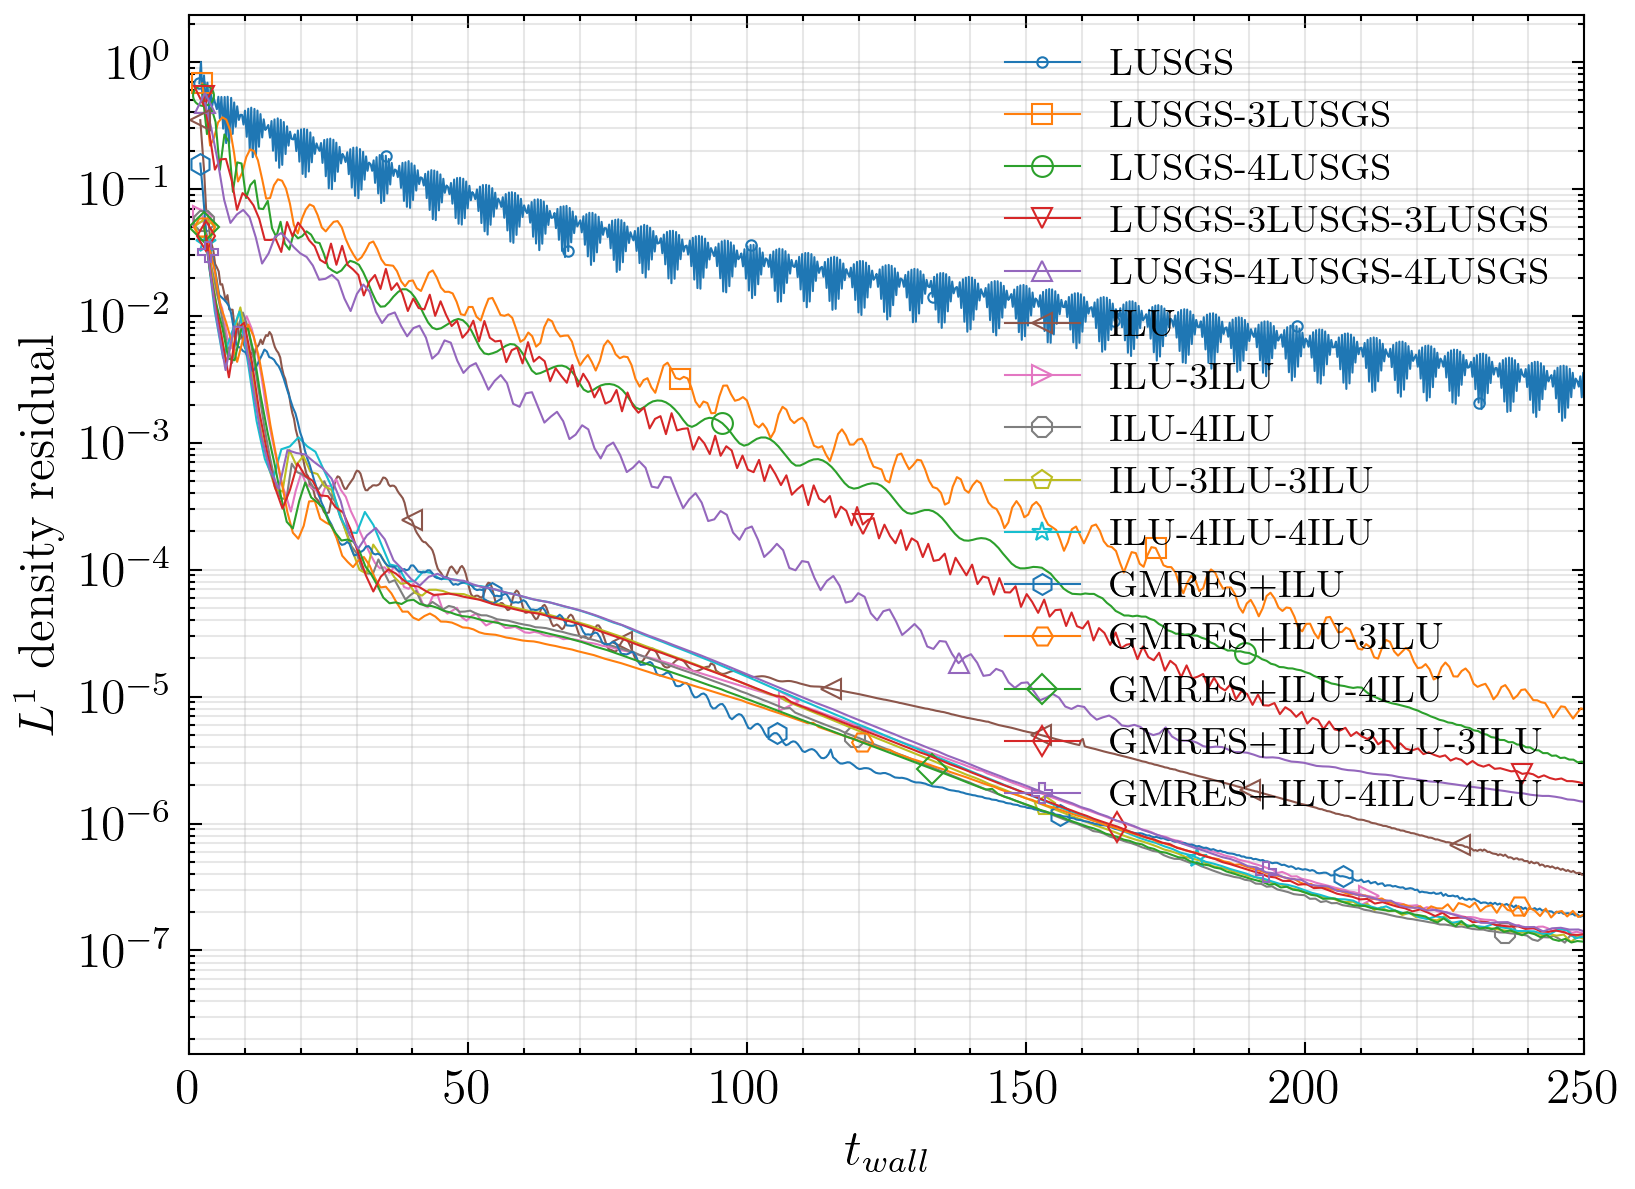

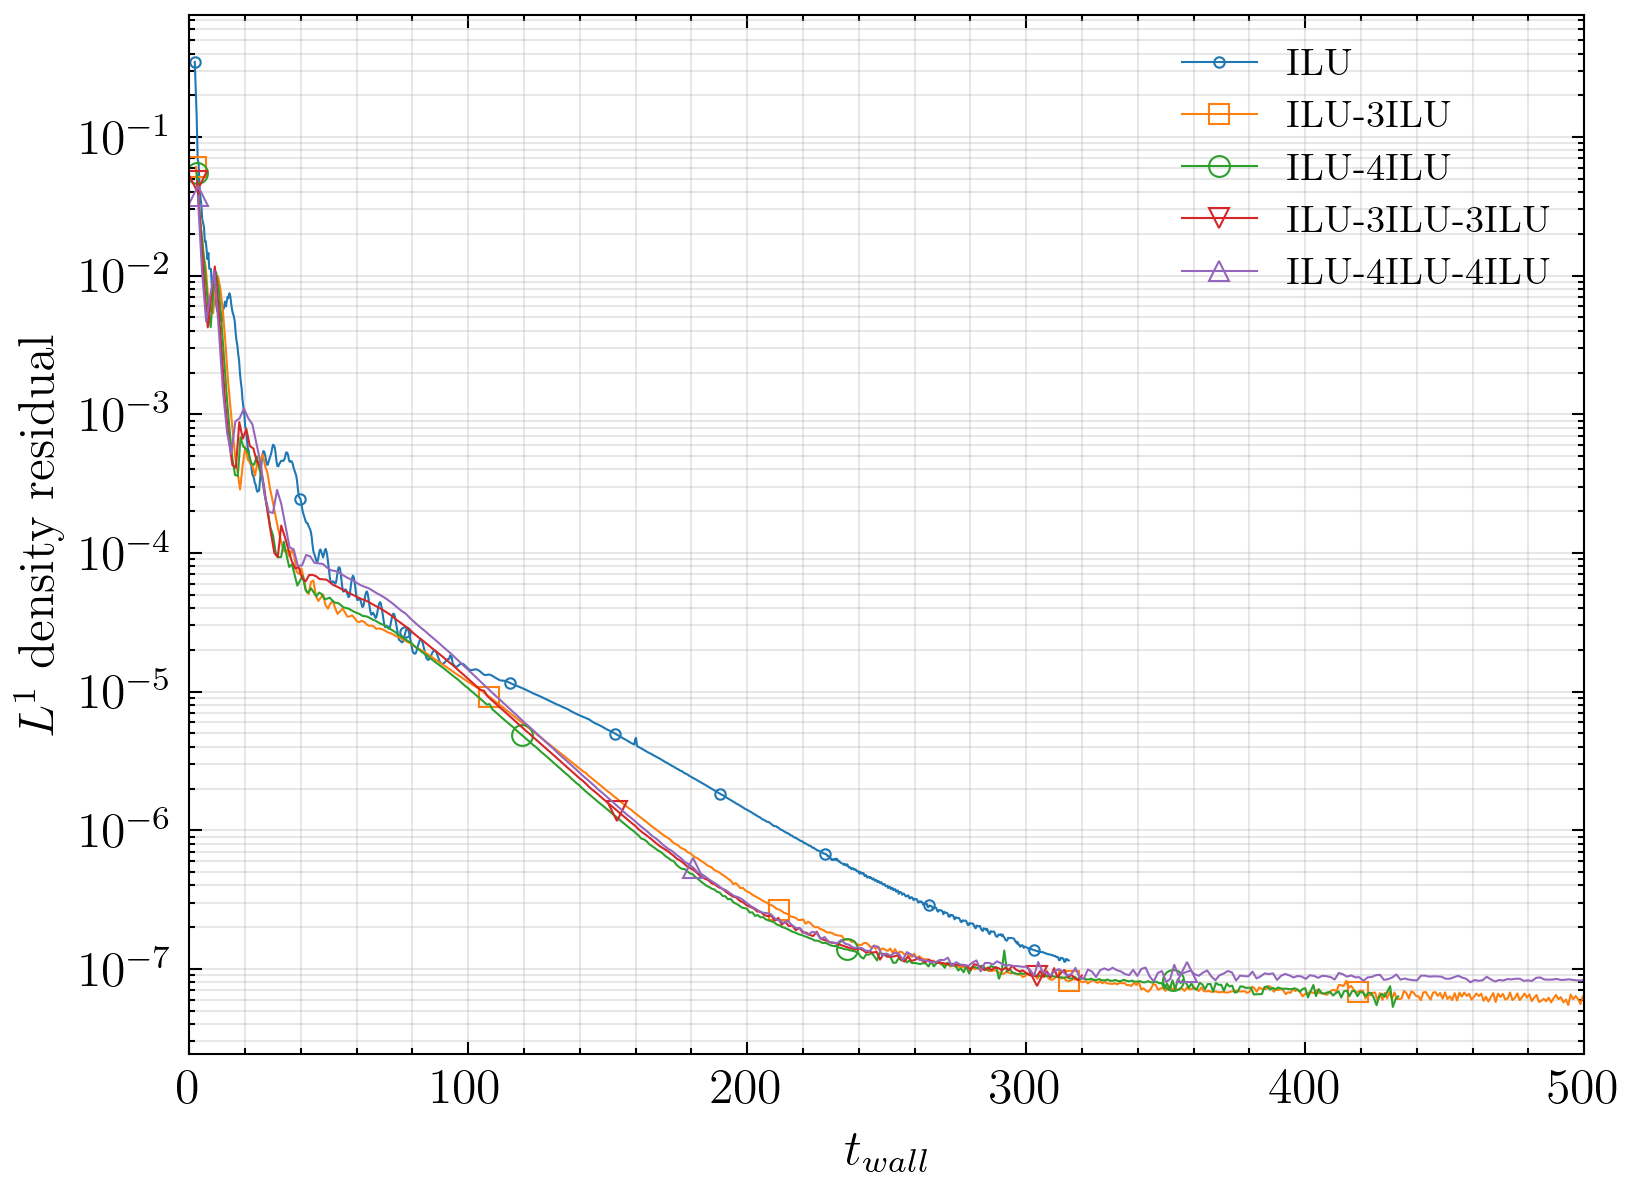

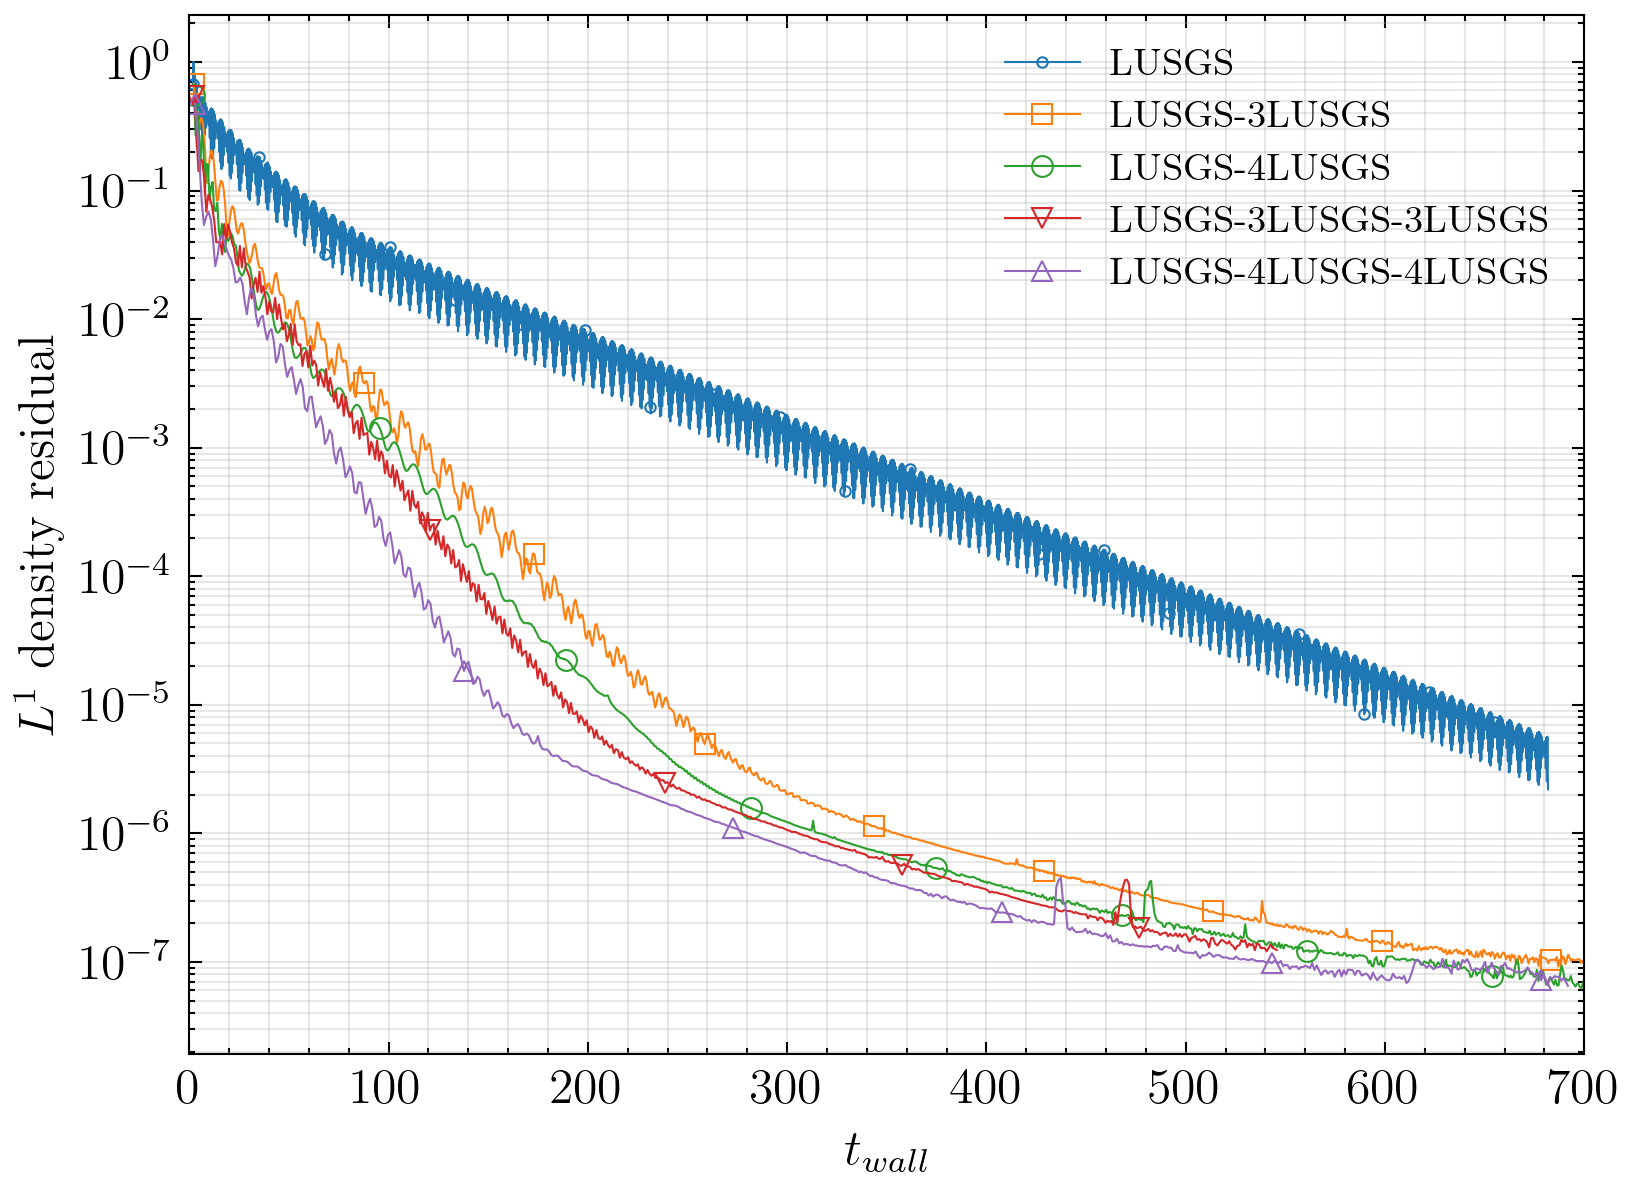

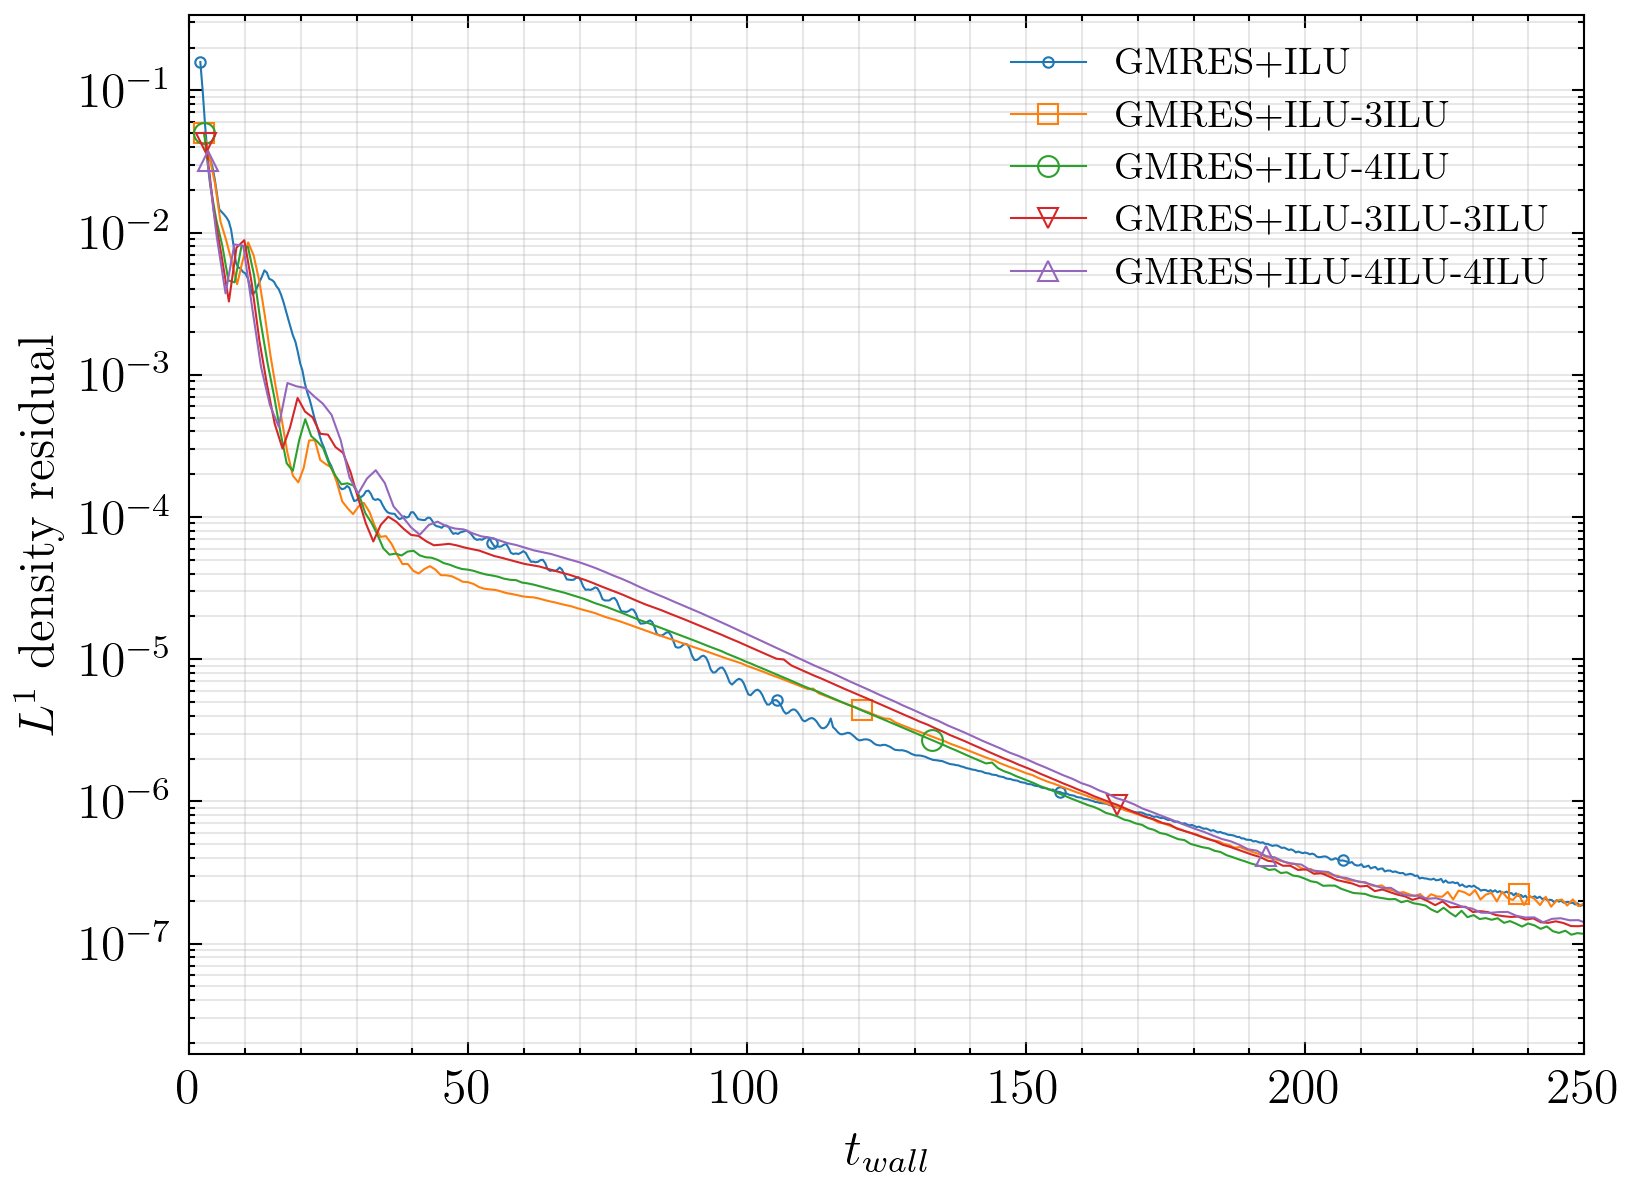

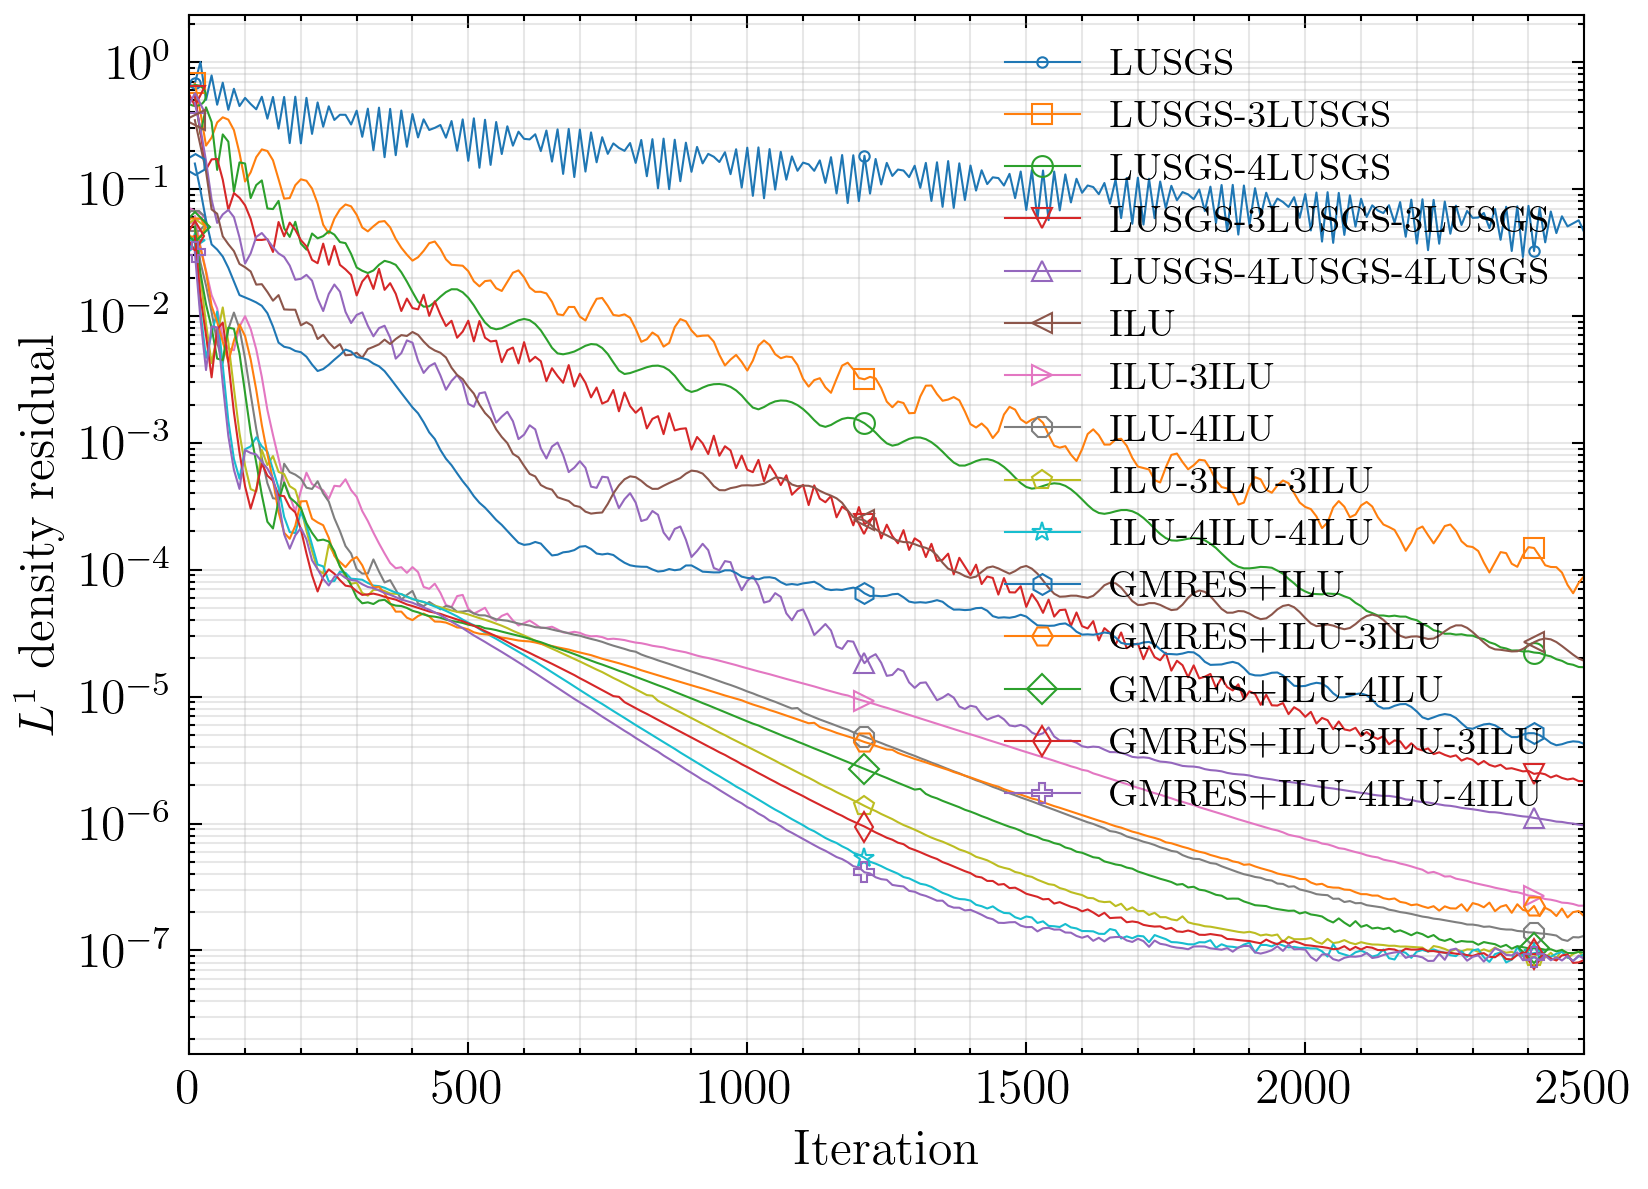

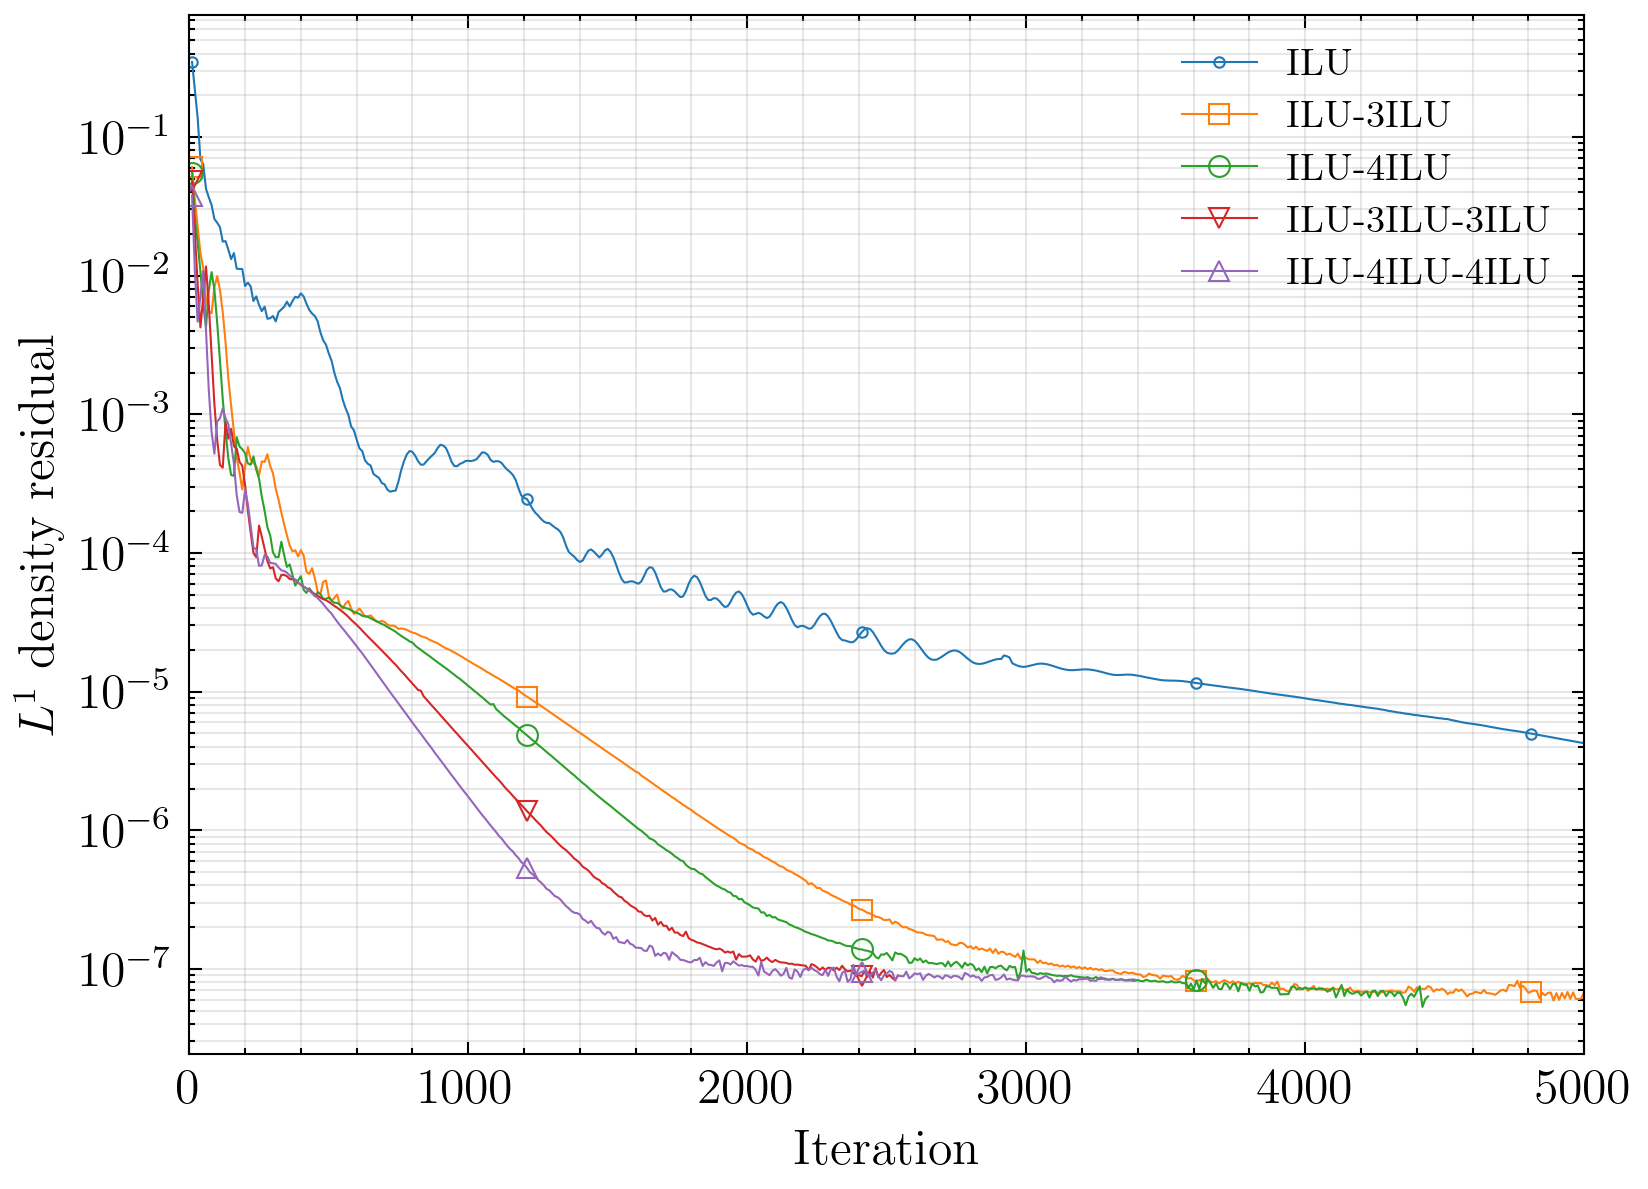

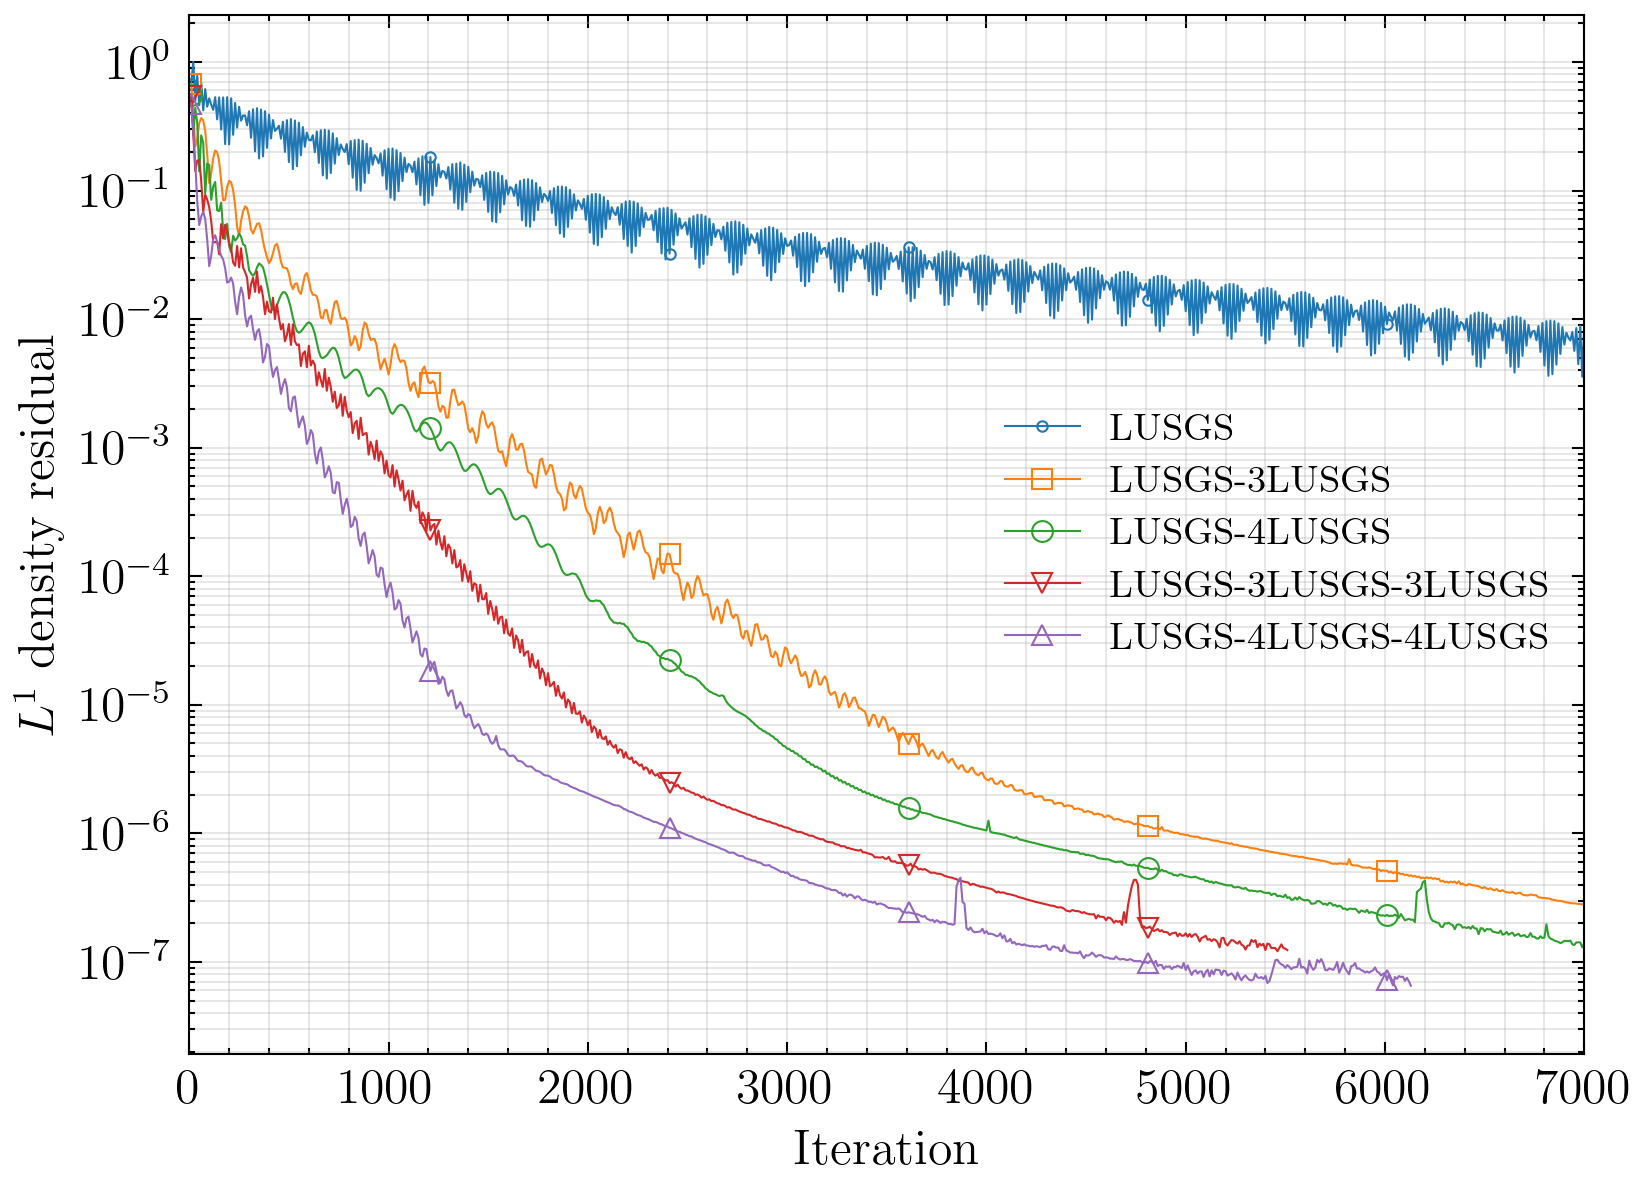

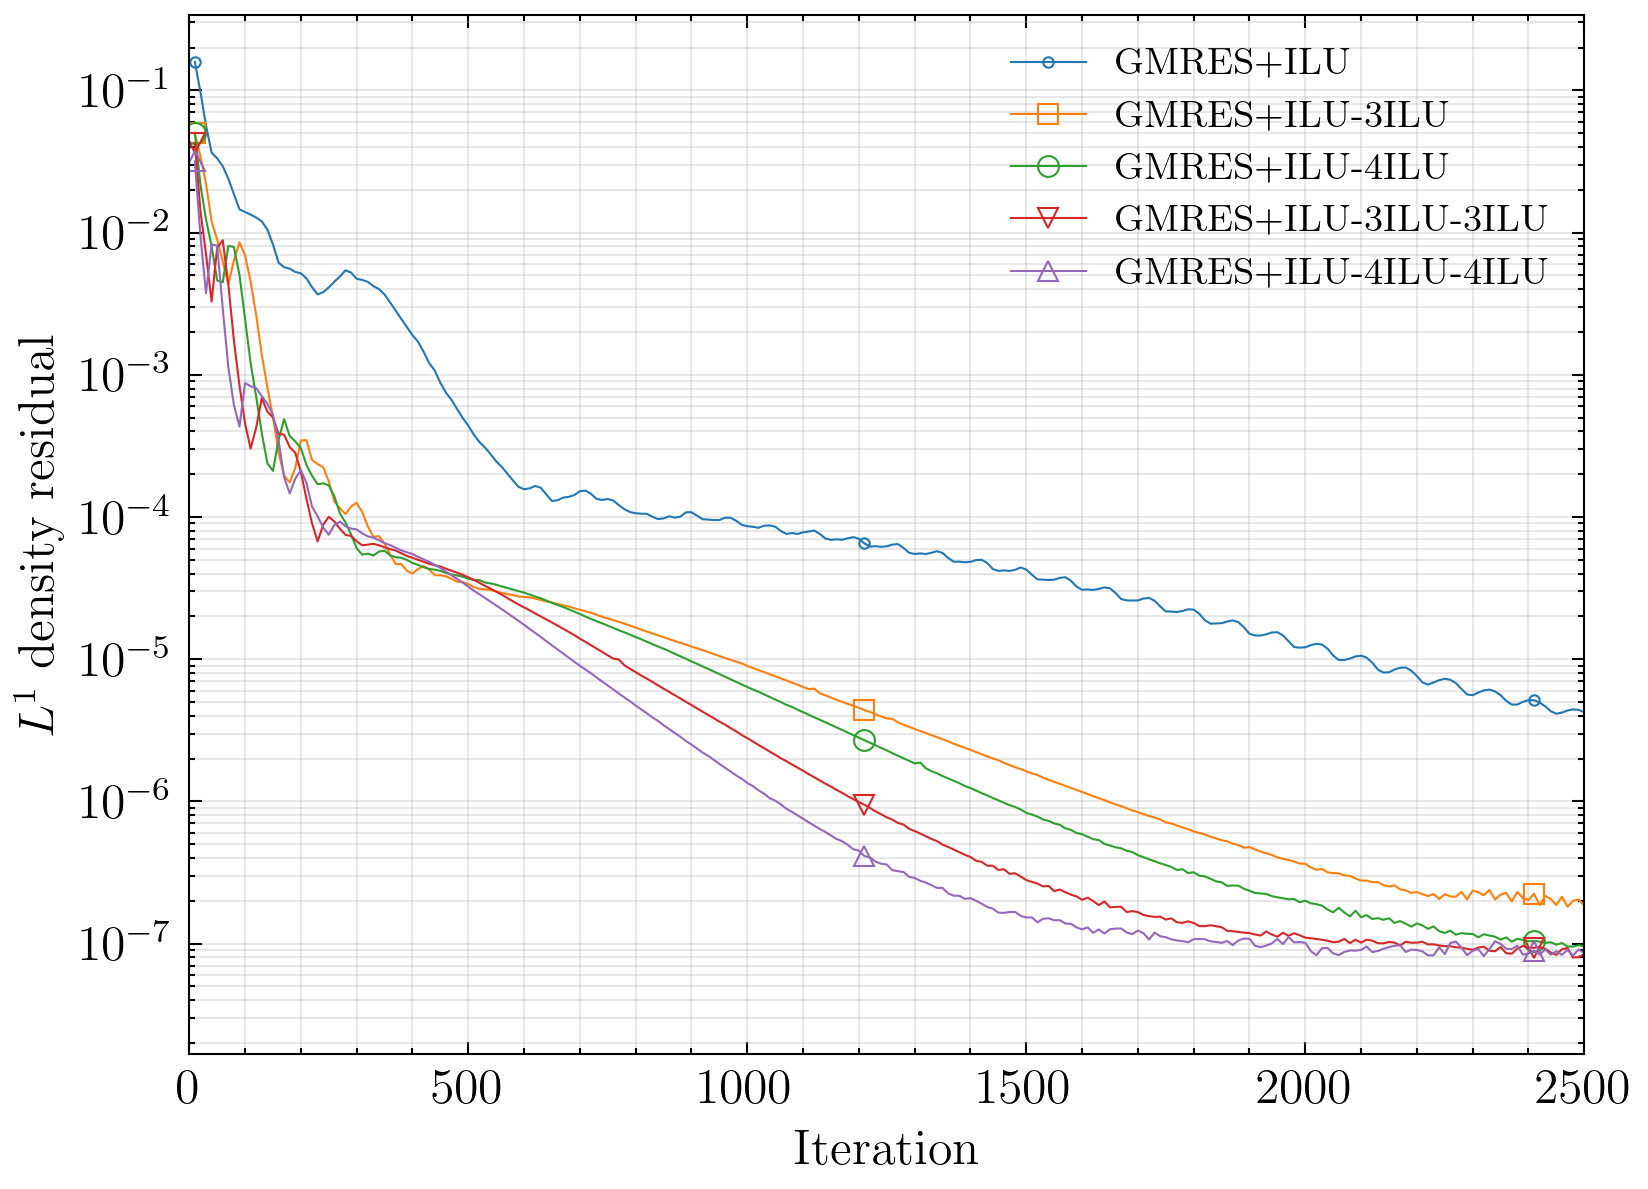

In [3]:
for ifig, subset in enumerate(series):
    if subset == "all":
        head = ""
    else:
        head = subset

    plt.figure(1003 + 10000 * ifig, figsize=(6, 4.5), dpi=300)
    plt.clf()

    # plt.title(f"AOA 15, res-time, {subset}")
    iMarker = 0
    for i, (data, name) in enumerate(data_AOA15):
        if name.startswith(head):
            plotOne(data, name_mapper(name), iMarker, xAxis="tWall", yAxis="res0")
            iMarker += 1
    plotAfter(
        (0, tRanges[ifig]), xlabel=r"$t_{wall}$", ylabel=r"$L^1$ density residual"
    )
    plt.savefig(f"0012_MG_VRes_AOA15_rt_{subset}.{format}", format=format)

for ifig, subset in enumerate(series):
    if subset == "all":
        head = ""
    else:
        head = subset

    plt.figure(1004 + 10000 * ifig, figsize=(6, 4.5), dpi=300)
    plt.clf()

    # plt.title(f"AOA 15, res-time, {subset}")
    iMarker = 0
    for i, (data, name) in enumerate(data_AOA15):
        if name.startswith(head):
            plotOne(data, name_mapper(name), iMarker, xAxis="iter", yAxis="res0")
            iMarker += 1
    plotAfter((0, nRanges[ifig]), xlabel=r"Iteration", ylabel=r"$L^1$ density residual")
    plt.savefig(f"0012_MG_VRes_AOA15_ri_{subset}.{format}", format=format)

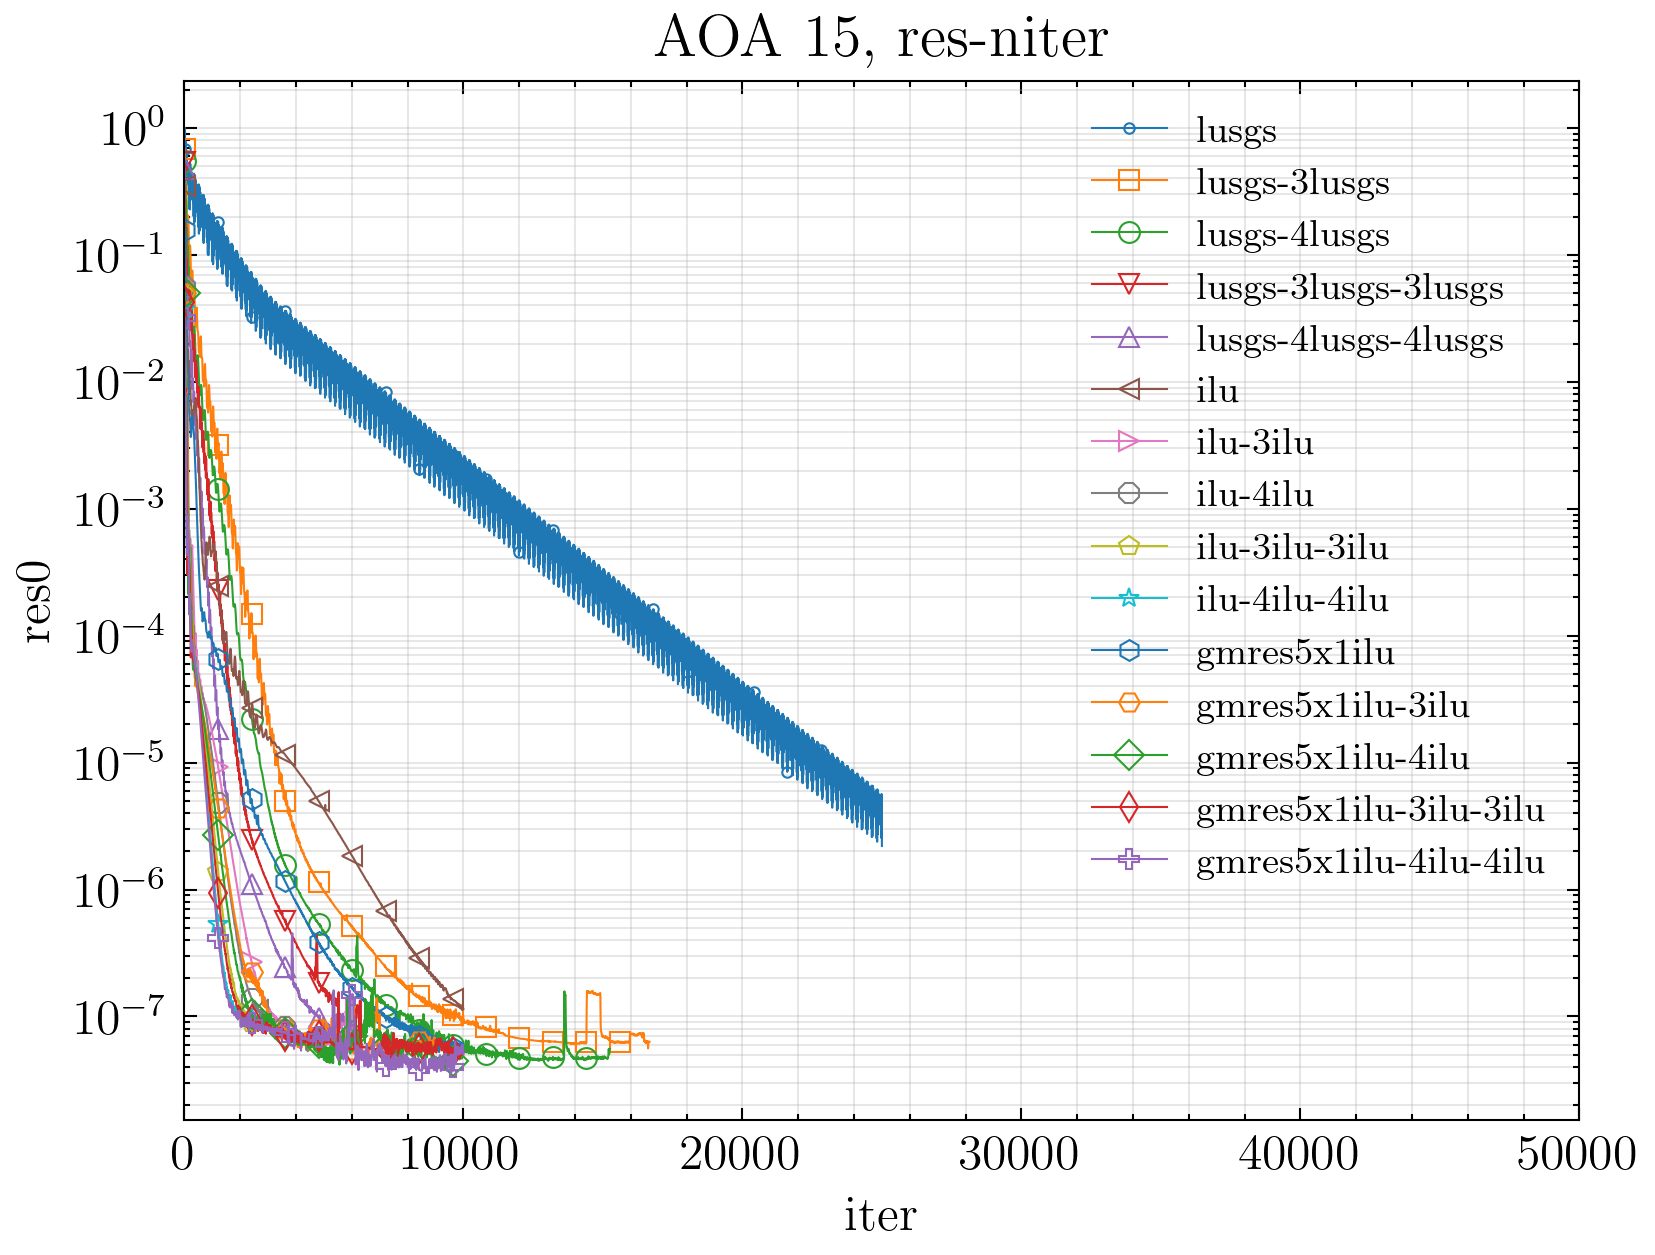

In [6]:
plt.figure(1004, figsize=(6, 4.5), dpi=300)
plt.clf()
plt.title("AOA 15, res-niter")
for i, (data, name) in enumerate(data_AOA15):
    plotOne(data, name, i, xAxis="iter", yAxis="res0")
plotAfter((0, 50000), xlabel="iter")
plt.savefig(f"0012_MG_VRes_AOA15_ri_{"all1"}.{format}", format=format)

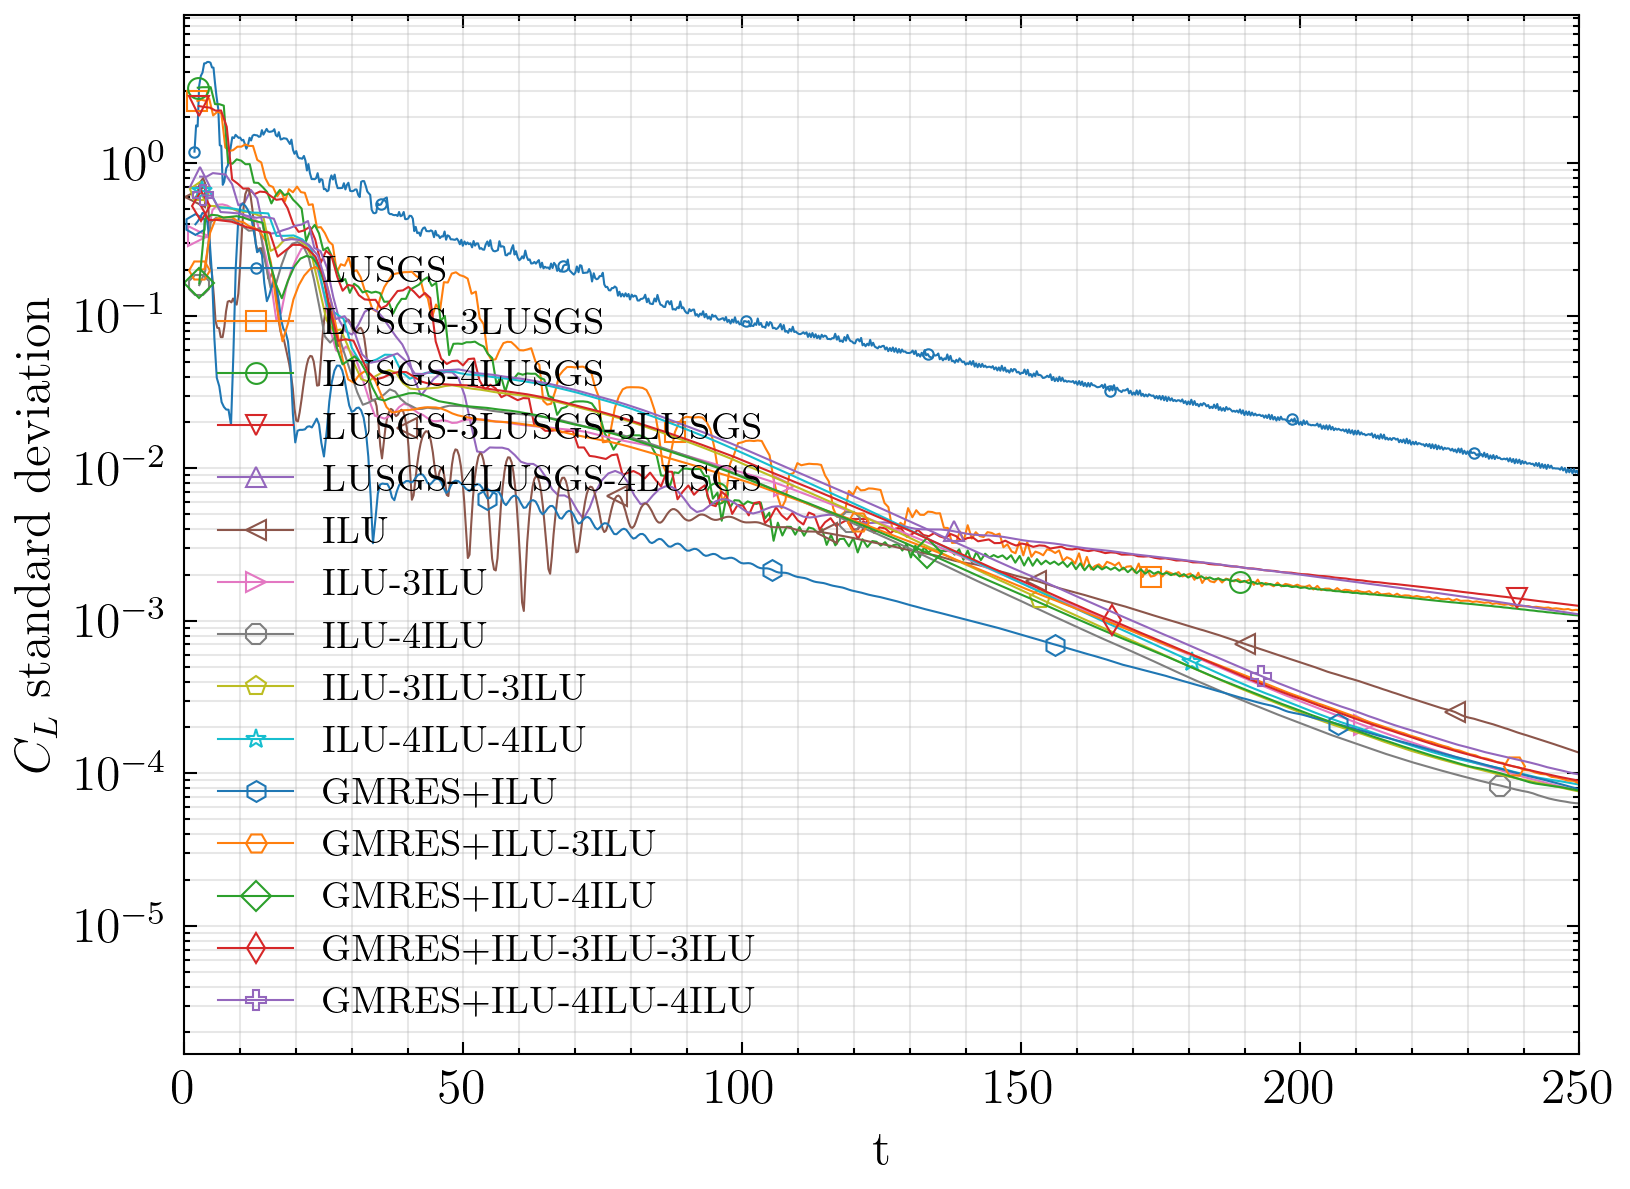

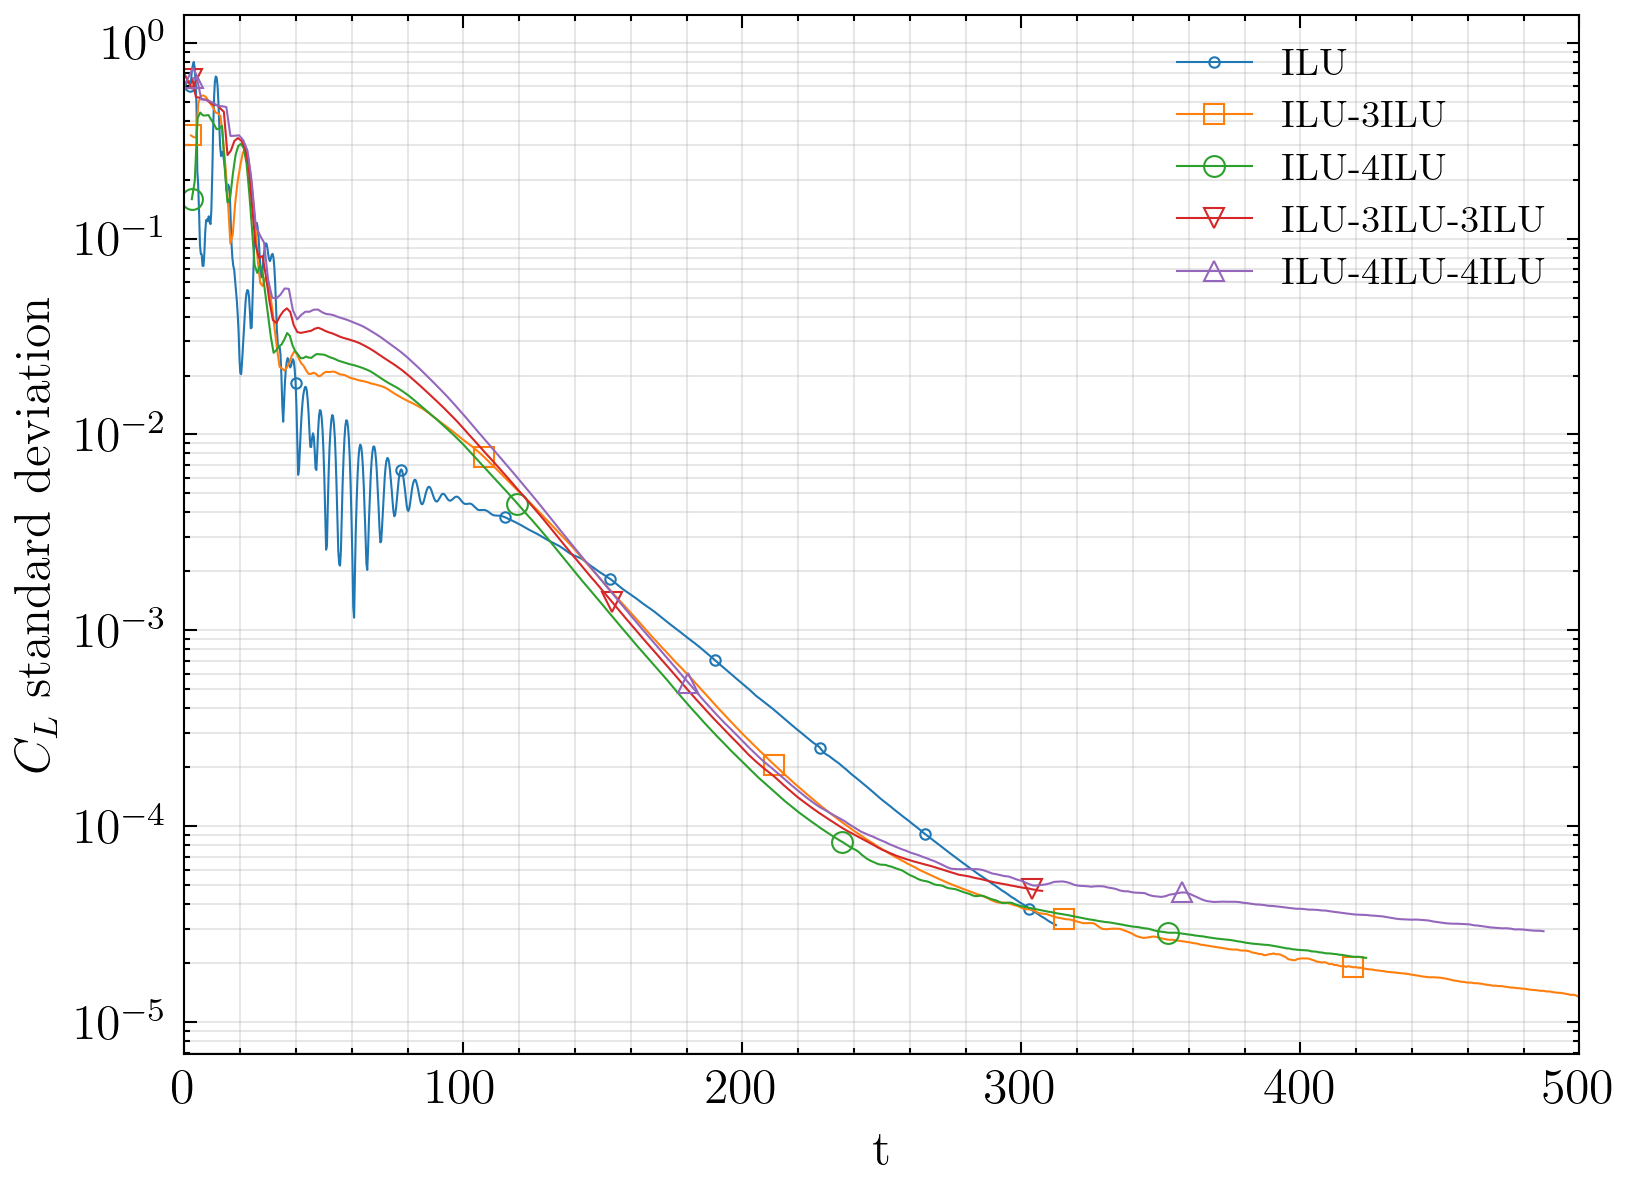

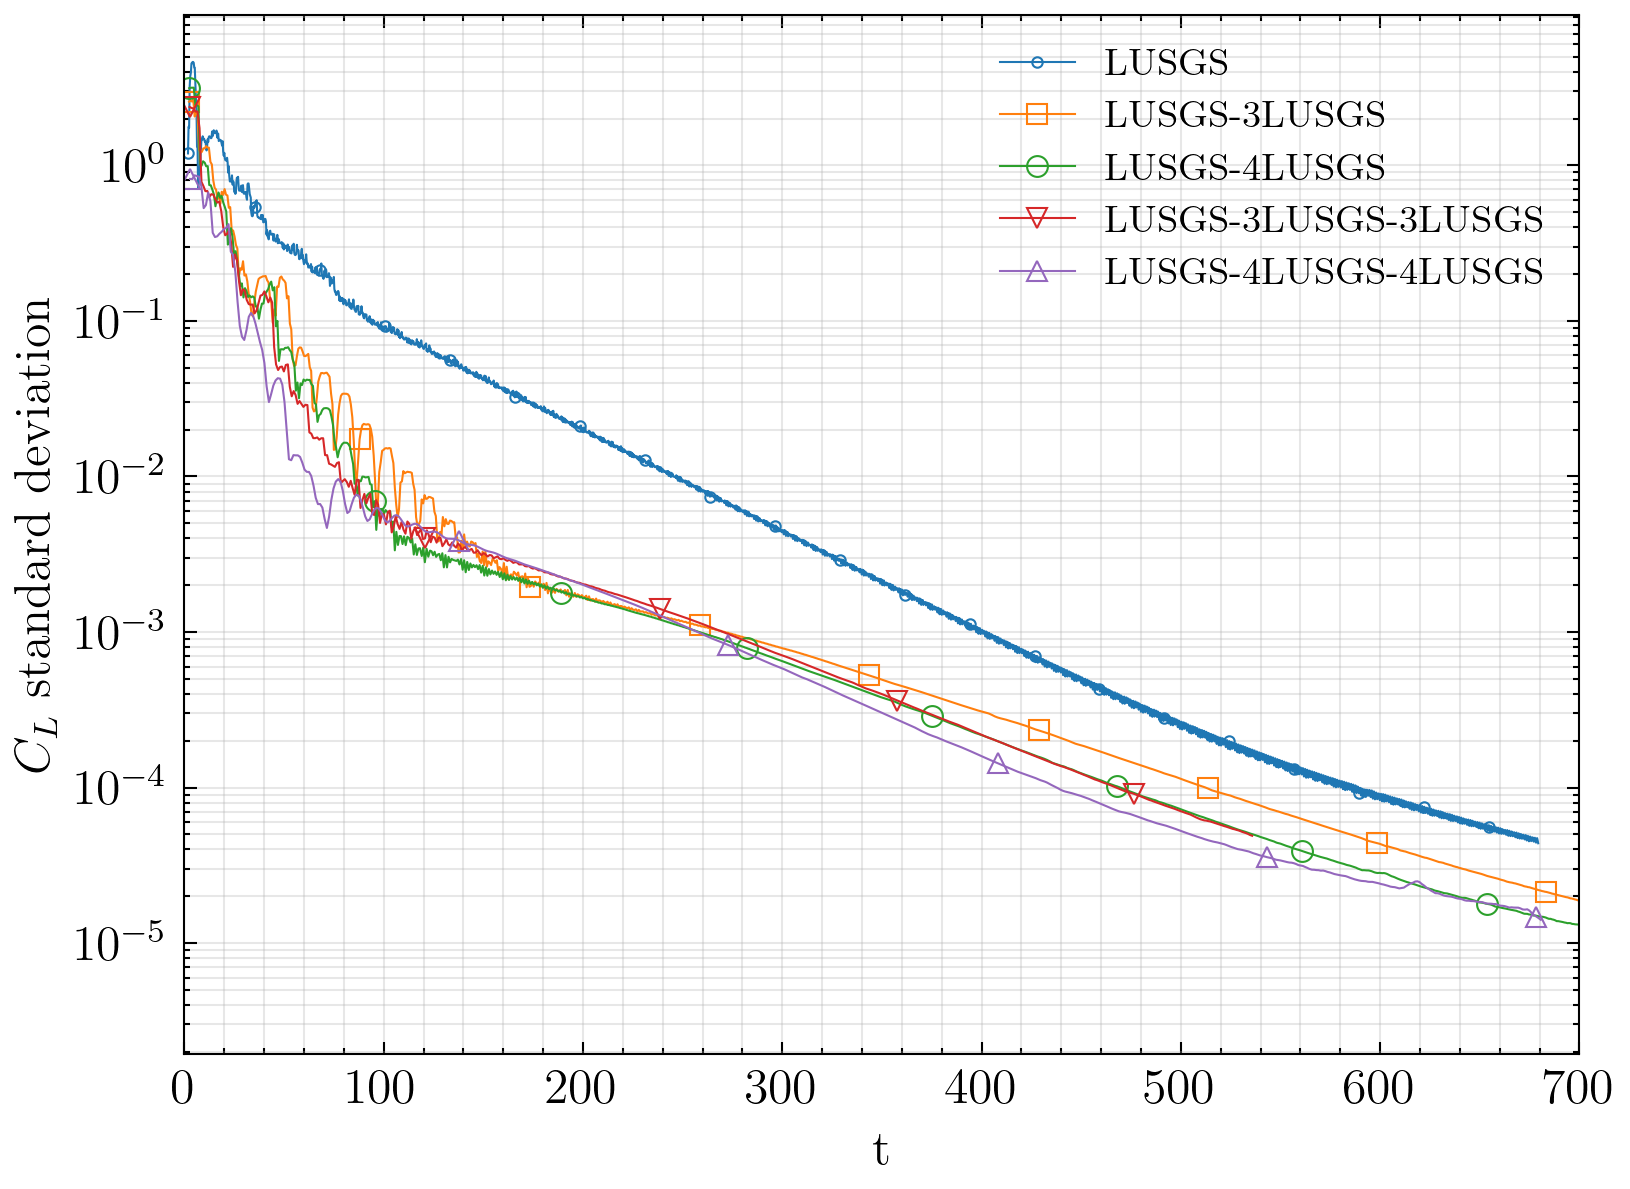

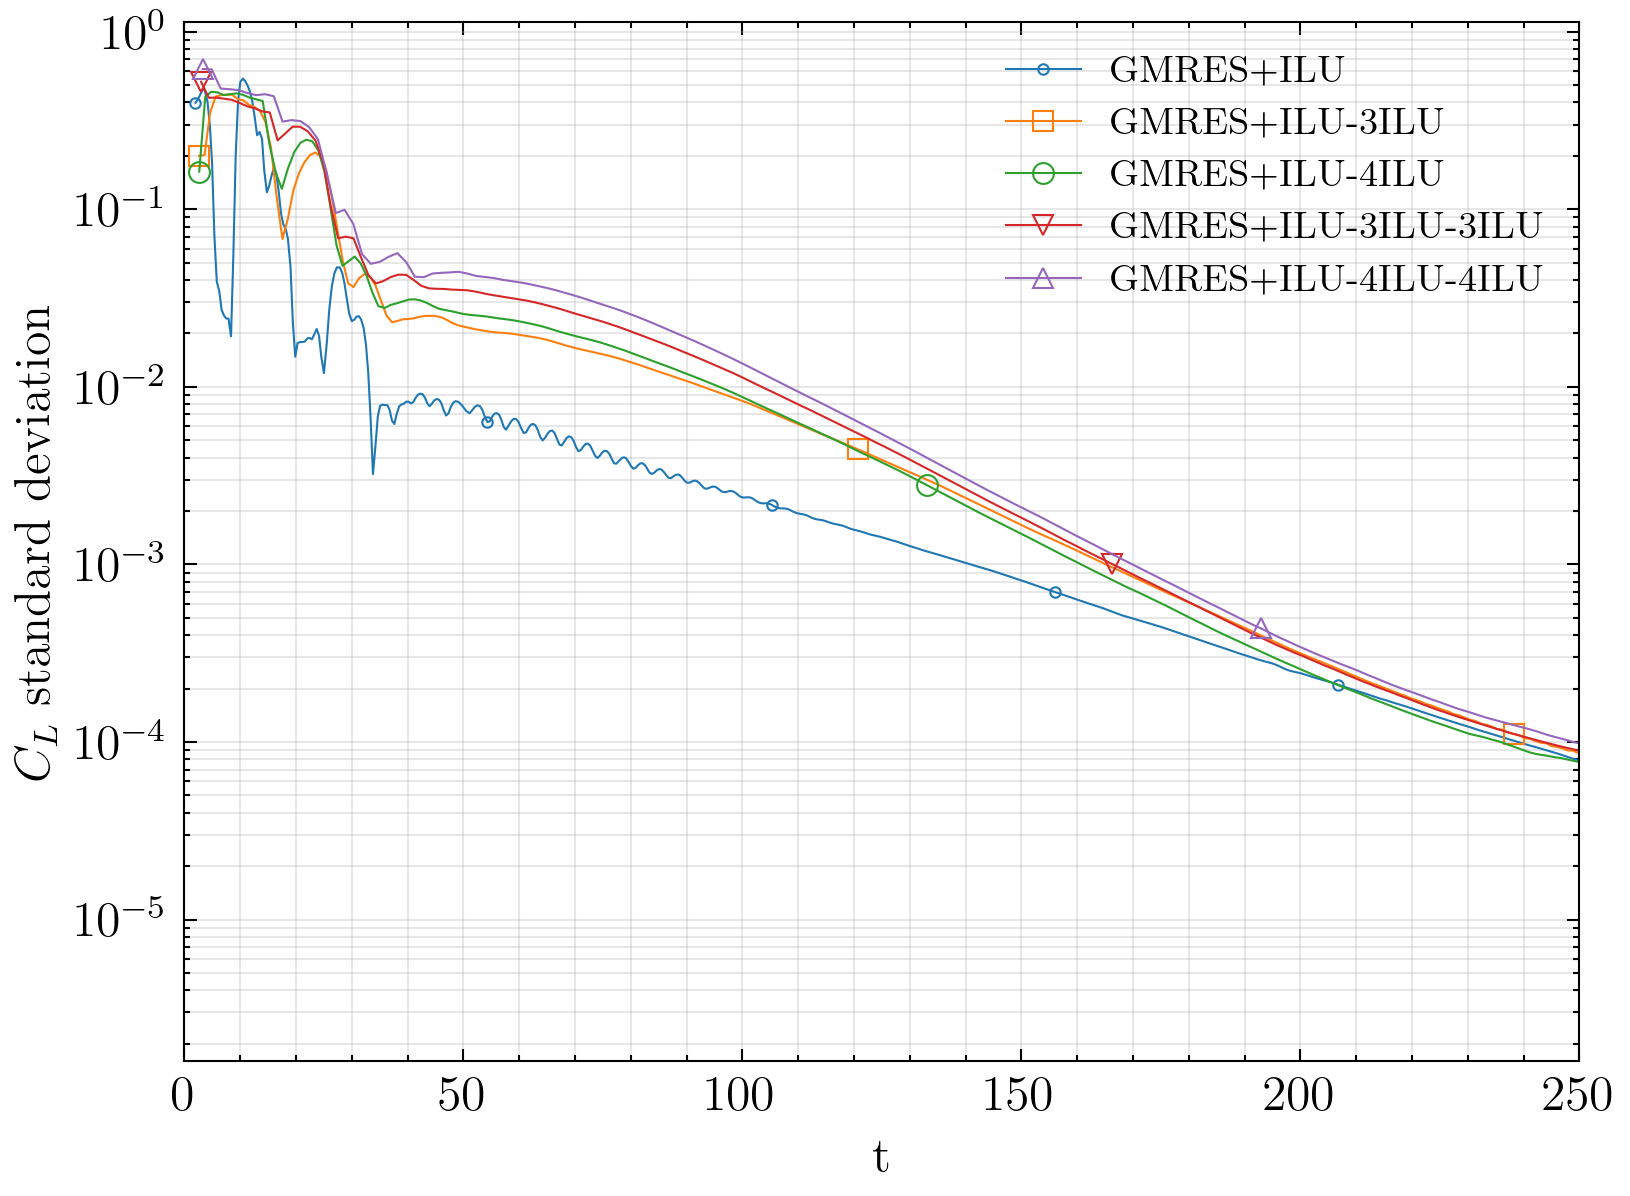

In [5]:
for ifig, subset in enumerate(series):
    if subset == "all":
        head = ""
    else:
        head = subset

    plt.figure(1005 + 10000 * ifig, figsize=(6, 4.5), dpi=300)
    # plt.title(f"AOA 15, CL std-time, {subset}")
    iMarker = 0
    for i, (data, name) in enumerate(data_AOA15):
        if name.startswith(head):
            plotOne(data, name_mapper(name), iMarker, xAxis="tWall", yAxis="CL", std=10)
            iMarker += 1
    plotAfter((0, tRanges[ifig]), xlabel="t", ylabel="$C_L$ standard deviation")
    plt.savefig(f"0012_MG_VRes_AOA15_clstdT_{subset}.{format}", format=format)